In [16]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 
import astropy.constants as ac
import astropy.units as u
import pandas as pd
from math import sqrt

## This section contains the plots for parts 4 and 5 of the assignment

In [2]:
tab = astropy.io.ascii.read("PS_2023.01.18_12.12.33.csv")

In [3]:
#importing data as a pandas dataframe
nea = pd.read_csv("PS_2023.01.18_12.12.33.csv", header=100)

In [4]:
# Data on the planets of our Solar System

# Masses are in kilograms, times 10 to the 24th power
# Radii (equitorial) are in kilometers
# Orbital periods are in days
# Distance from the Sun (semimajor axis) is in AU (astronomical units)
# Average temperatures are in Kelvin
# Density in kg/m^3

planet_data = {
    "Mercury": {"mass":0.33011,"radius":2439.7,"orbital period":88,"semimajor axis":0.387,"average temperature":440.15,"density":5429},
    "Venus": {"mass":4.8675,"radius":6051.8,"orbital period":225,"semimajor axis":0.723,"average temperature":737.15,"density":5243},
    "Earth": {"mass":5.9724,"radius":6378.137,"orbital period":365,"semimajor axis":1,"average temperature":288.15,"density":5513},
    "Mars": {"mass":0.64171,"radius":3396.2,"orbital period":687,"semimajor axis":1.524,"average temperature":208.15,"density":3934},
    "Jupiter": {"mass":1898.19,"radius":71492,"orbital period":4333,"semimajor axis":5.204,"average temperature":163.15,"density":1326},
    "Saturn": {"mass":568.34,"radius":60268,"orbital period":10756,"semimajor axis":9.583,"average temperature":133.15,"density":687},
    "Uranus": {"mass":86.813,"radius":25559,"orbital period":30667,"semimajor axis":19.201,"average temperature":78.15,"density":1270},
    "Neptune": {"mass":102.413,"radius":24764,"orbital period":60190,"semimajor axis":30.048,"average temperature":73.15,"density":1638},}

In [5]:
# Creating a list of the radii of each planet.
all_radius = []
Earthrad = planet_data["Earth"]["radius"]

# Run through all the dictionary values, and extract the radius 
# of each planet from the list.

for planet in planet_data.values():
        all_radius.append(planet["radius"]/Earthrad)

In [6]:
print(all_radius)

[0.3825098143862385, 0.9488350595165956, 1.0, 0.5324752353234181, 11.208915706890586, 9.44915419659377, 4.007283004425901, 3.882638456966353]


In [7]:
# Creating a list of the masses of each planet.
all_mass = []
Earthmass = planet_data["Earth"]["mass"]

# Run through all the dictionary values, and extract the mass 
# of each planet from the list.

for planet in planet_data.values():
        all_mass.append(planet["mass"]/Earthmass)

In [8]:
print(all_mass)

[0.05527258723461255, 0.8149989953787421, 1.0, 0.10744591788895586, 317.8270042194093, 95.16107427499833, 14.535697542026655, 17.147712812269774]


In [9]:
# Creating a list of the densities of each planet.
all_density = []
Earthdensity = planet_data["Earth"]["density"]

# Run through all the dictionary values, and extract the density 
# of each planet from the list.

for planet in planet_data.values():
        all_density.append(planet["density"]/Earthdensity)

In [10]:
print(all_density)

[0.9847632867767095, 0.9510248503537094, 1.0, 0.7135860692907673, 0.2405224015962271, 0.12461454743333938, 0.23036459278070015, 0.29711590785416286]


# Plots below are mostly finished, just need the data from GJ436b to complete

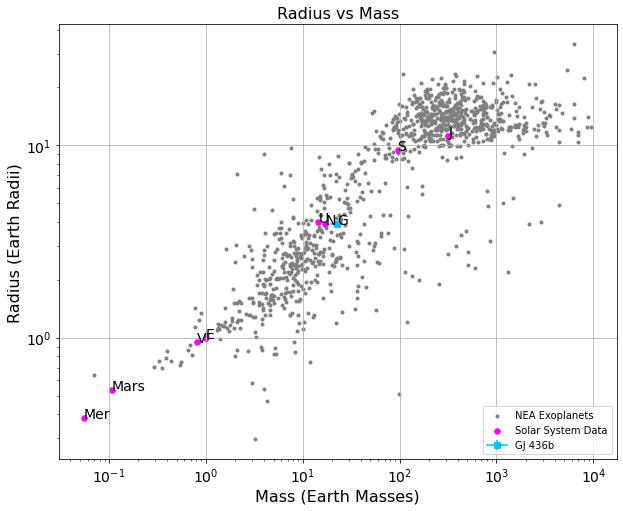

In [20]:
#plotting radius vs mass for all planets including GJ436b

fig, ax = plt.subplots(figsize=(10,8))

# Plotting both data sets with labels and markers
plt.grid()
plt.scatter(nea.pl_bmasse, nea.pl_rade, color="gray", marker=".", label="NEA Exoplanets")
plt.scatter(all_mass, all_radius, label="Solar System Data",color='magenta', marker="H")

#plotting GJ436b
plt.errorbar(22.52, 3.916, xerr=3.33, yerr=0.0111, color="deepskyblue", marker="s", label="GJ 436b")
plt.annotate("G", (22.52, 3.916), fontsize=14)

plt.annotate("Mer", (all_mass[0], all_radius[0]), fontsize=14)
plt.annotate("V", (all_mass[1], all_radius[1]), fontsize=14)
plt.annotate("E", (all_mass[2], all_radius[2]), fontsize=14)
plt.annotate("Mars", (all_mass[3], all_radius[3]), fontsize=14)
plt.annotate("J", (all_mass[4], all_radius[4]), fontsize=14)
plt.annotate("S", (all_mass[5], all_radius[5]), fontsize=14)
plt.annotate("U", (all_mass[6], all_radius[6]), fontsize=14)
plt.annotate("N", (all_mass[7], all_radius[7]), fontsize=14)
plt.xscale("log")
plt.yscale("log")

# Setting plot limits
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.2, 50)
#Setting labels
ax.set_xlabel("Mass (Earth Masses)", fontsize=16)
ax.set_ylabel("Radius (Earth Radii)", fontsize=16)
ax.set_title("Radius vs Mass", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.legend(loc="lower right")
plt.show()
fig.savefig('RadiusMass.png', bbox_inches='tight')

In [12]:
def densitycalc(m, r):
    '''
    Calculates the density of a planet given its mass and radius
    Inputs: mass in units of earth mass, radii in units of earth radii
    Output: Density in units of Earth densities (5513 kg/m^3) 
    '''
    d = (3*m*5.9724E24)/(4*np.pi*(r*6378137)**3)
    de = d/5513
    return de

In [13]:
#calculating the densities of each planet in the NEA list in units of Earth densities

nea["density_e"]=densitycalc(nea.pl_bmasse, nea.pl_rade)

In [14]:
#finding the density of GJ 436 b
densitycalc(22.52, 3.916)

0.3737929373535458

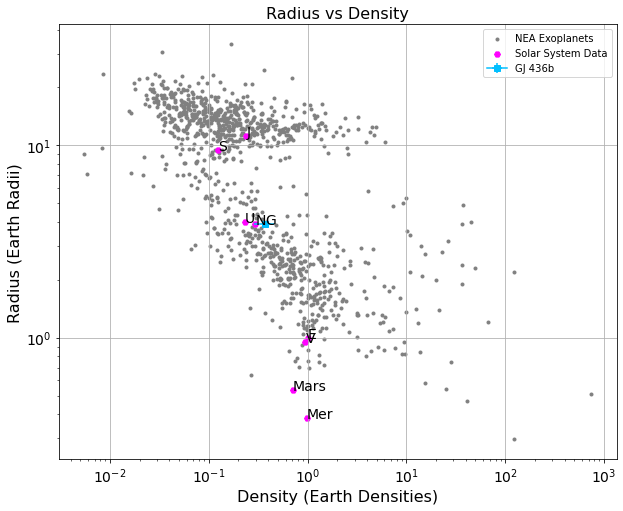

In [21]:
#plotting radius vs density of all planets in the NEA sample along with GJ436b

fig, ax = plt.subplots(figsize=(10,8))
# Plotting both data sets with labels and markers
plt.grid()
plt.scatter(nea.density_e, nea.pl_rade, color="gray", marker=".", label="NEA Exoplanets")
plt.scatter(all_density, all_radius, label="Solar System Data",color='magenta', marker="H")

#plotting GJ436b
plt.errorbar(0.373792, 3.916, xerr=0.087, yerr=0.0111, color="deepskyblue", marker="s", label="GJ 436b")
plt.annotate("G", (0.373792, 3.916), fontsize=14)

plt.annotate("Mer", (all_density[0], all_radius[0]), fontsize=14)
plt.annotate("V", (all_density[1], all_radius[1]), fontsize=14)
plt.annotate("E", (all_density[2], all_radius[2]), fontsize=14)
plt.annotate("Mars", (all_density[3], all_radius[3]), fontsize=14)
plt.annotate("J", (all_density[4], all_radius[4]), fontsize=14)
plt.annotate("S", (all_density[5], all_radius[5]), fontsize=14)
plt.annotate("U", (all_density[6], all_radius[6]), fontsize=14)
plt.annotate("N", (all_density[7], all_radius[7]), fontsize=14)
plt.xscale("log")
plt.yscale("log")
# Setting plot limits
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.2, 50)
#Setting labels
ax.set_xlabel("Density (Earth Densities)", fontsize=16)
ax.set_ylabel("Radius (Earth Radii)", fontsize=16)
ax.set_title("Radius vs Density", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.legend(loc="upper right")
plt.show()
fig.savefig('DensityRadius.png', bbox_inches='tight')